# A simple example to demonstrate Pandas data frames

[Pandas](https://pandas.pydata.org/) is a data analysis library for Python. The aim of this notebook is to read the summary page of the [Living Review of Machine Learning for Particle Physics](https://iml-wg.github.io/HEPML-LivingReview/) into a pandas data frame and perform some basic statistical analysis. We will read in the text and process with a language processing toolkit 'nltk'.

We will try to answer the following questions

* How many articles are included in the reivew?
* What are the most common words in the article titles?
* How do the trends in common terms change with arxiv date?


In [1]:
import re
import string
# natural language toolkit
import nltk

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from collections import Counter
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords

In [2]:
nltk.download('punkt')
nltk.download('stopwords')

STOP_WORDS = stopwords.words()

[nltk_data] Downloading package punkt to /Users/simon/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /Users/simon/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [3]:
%matplotlib inline

In [4]:
# if using google colab
#!git clone https://github.com/enocera/FIS0204.git

In [5]:
#import sys
#sys.path.append('/content/FIS0204/Lectures/Lecture_08/PandasExample/')
#%cd /content/FIS0204/Lectures/Lecture_08/PandasExample/

* First we defining a function which will clean spurious/useless text from each line

In [6]:
def cleaning(text):
    """
    Convert to lowercase.
    remove URL links, special characters and punctuation.
    Tokenize and remove stop words.
    """

    text = re.sub('https?://\S+|www\.\S+', '', text)
    text = re.sub('<.*?>+', '', text)
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
    text = re.sub('\n', '', text)
    text = re.sub('[’“”…]', '', text)

    # removing the stop-words
    text_tokens = word_tokenize(text)
    tokens_without_sw = [
        word for word in text_tokens if not word in STOP_WORDS]
    filtered_sentence = (" ").join(tokens_without_sw)
    text = filtered_sentence

    return text

In [30]:
# README.md taken from https://github.com/iml-wg/HEPML-LivingReview
with open('index.md', 'r') as file:
        data = file.read()

* Now read the whole file into a Pandas data frame which is split by line breaks

In [31]:
df = pd.DataFrame([x.split(';') for x in data.split('\n')])

* Let's see what we've got with df.info()

In [32]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2889 entries, 0 to 2888
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   0       2889 non-null   object
 1   1       50 non-null     object
dtypes: object(2)
memory usage: 45.3+ KB


From this we can see the number of lines and look at the their contents using df[<data #>]. From the line-by-line split there is only 1 data entry with two columns: line number and the text from that line

In [106]:
df[0][150]

'    * [The LHC Olympics 2020: A Community Challenge for Anomaly Detection in High Energy Physics](https://arxiv.org/abs/2101.08320) [[DOI](https://doi.org/10.1088/1361-6633/ac36b9)] (2021)'

The Length is indicative of the number of articles but not exactly since there are alse section headings and other descriptions included.

Q: Can you filter the text to find the number of articles?

## Counting occurances of keywords

In [109]:
# Now put everything in lower case
df['text'] = df[0].str.lower()

In [110]:
# and filter the words according to the rules defined above
dt = df['text'].apply(cleaning)

In [111]:
# now we can split into words and count the frequency
word_count = Counter(" ".join(dt).split()).most_common(30)
word_frequency = pd.DataFrame(word_count, columns = ['Word', 'Frequency'])
print(word_frequency)

              Word  Frequency
0         learning        670
1             2023        468
2             2024        458
3           neural        425
4          machine        424
5             2025        369
6          physics        322
7         networks        310
8             2021        304
9             2022        288
10            deep        246
11            2020        228
12             jet        199
13        particle        187
14         network        160
15             lhc        153
16  reconstruction        147
17          models        139
18          energy        134
19       detection        129
20      generative        122
21           graph        119
22         anomaly        115
23         tagging        102
24            data        102
25            fast         97
26         quantum         95
27           event         95
28            high         93
29            2019         91


# Looking at the appearance of keywords over time

For this analysis, a new file was prepared by passing regular expression pattern matching on the original README.md using vim.

Exercise: Achieve the same result processing only in Python

In [113]:
# process README.md in vim using
# :g!/\* \[/d
# :%s/* \[\([^]]*\)\]([^0-9]*.\([0-9][0-9]\)\([0-9][0-9]\).[0-9]*).*$/"\1", \2, \3/
# :%s/^\s*//
# :g/\*/d
# add top line - title, year, month
# save as READMEtest.md
df2 = pd.read_csv('indextest.md')

In [114]:
# thanks to the better formatting read_csv finds the column structure and
# assigns the names accorinding to the headings provided
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2324 entries, 0 to 2323
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   title   2324 non-null   object
 1   year    2324 non-null   int64 
 2   month   2324 non-null   int64 
dtypes: int64(2), object(1)
memory usage: 54.6+ KB


In [116]:
# watch out for the space in ' year' and ' month' - bad preprocessing. Can you fix it?
df2['title-clean'] = df2['title'].str.lower().apply(cleaning)
df2['date'] = df2['year'] + (df2['month']-1)/12

In [117]:
# filter by year using df.drop top look at the last year only
df2filter_test  = df2.drop(df2[(df2['year']<26)].index)[['title-clean','date']]
df2filter_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11 entries, 102 to 1545
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   title-clean  11 non-null     object 
 1   date         11 non-null     float64
dtypes: float64(1), object(1)
memory usage: 264.0+ bytes


In [118]:
df2filter_test

,title-clean,date
102,quark versus gluon jet tagging jet images atla...,31.583333
120,convolutional neural networks event images pil...,71.250000
252,deep sets based neural networks impact paramet...,78.333333
342,quark versus gluon jet tagging jet images atla...,31.583333
405,deep sets based neural networks impact paramet...,78.333333
1068,convolutional neural networks event images pil...,71.250000
1127,generalized numerical inversion neural network...,63.666667
1128,simultaneous jet energy mass calibrations neur...,75.000000
1423,performance massdecorrelated jet substructure,63.666667
1495,deep generative models fast shower simulation ...,63.250000


In [101]:
# this is the list of words from before:
word_frequency['Word']

0           learning
1               2023
2               2024
3             neural
4            machine
5               2025
6            physics
7           networks
8               2021
9               2022
10              deep
11              2020
12               jet
13          particle
14           network
15               lhc
16    reconstruction
17            models
18            energy
19         detection
20        generative
21             graph
22           anomaly
23           tagging
24              data
25              fast
26           quantum
27             event
28              high
29              2019
Name: Word, dtype: object

In [119]:
# now we can filter by some common title keywords
df2filter1 = df2.drop(df2[df2['title-clean'].str.contains( word_frequency['Word'][0] )==False].index)
df2filter2 = df2.drop(df2[df2['title-clean'].str.contains( word_frequency['Word'][6] )==False].index)
df2filter3 = df2.drop(df2[df2['title-clean'].str.contains( word_frequency['Word'][20] )==False].index)
df2filter4 = df2.drop(df2[df2['title-clean'].str.contains( word_frequency['Word'][21] )==False].index)
df2filter5 = df2.drop(df2[df2['title-clean'].str.contains( word_frequency['Word'][26] )==False].index)

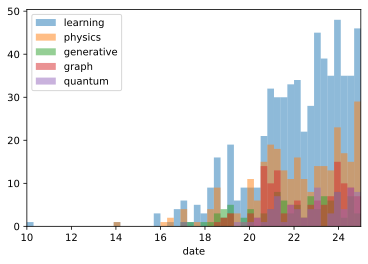

In [120]:
# we can plot the appearances of the most common word from 2010 to 2025
mybins = np.histogram_bin_edges(df2filter1['date'], bins=50, range=(10,25))

plt.hist(df2filter1['date'], density=False, bins=mybins, alpha=0.5, label=word_frequency['Word'][0])
plt.hist(df2filter2['date'], density=False, bins=mybins, alpha=0.5, label=word_frequency['Word'][6])
plt.hist(df2filter3['date'], density=False, bins=mybins, alpha=0.5, label=word_frequency['Word'][20])
plt.hist(df2filter4['date'], density=False, bins=mybins, alpha=0.5, label=word_frequency['Word'][21])
plt.hist(df2filter5['date'], density=False, bins=mybins, alpha=0.5, label=word_frequency['Word'][26])
plt.xlim([10,25])
plt.xlabel('date')
plt.legend(loc='upper left')

# Exercise

Make plot of the keywords appearing 6th, 16th, 21st and 28th most frequent of the last 10 years